### We try to use clustering models for number of passengers and number of flights

In [1]:
#import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
df.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804
18884,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Enplaned,Other,International,A,1243


In [5]:
df.sample(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
1764,200610,Horizon Air,QX,Alaska Airlines,AS,Domestic,US,Deplaned,Other,Terminal 1,B,4407
16060,201611,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,E,274493
10771,201303,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,5029
4599,200810,Hawaiian Airlines,HA,Hawaiian Airlines,HA,Domestic,US,Enplaned,Other,Terminal 1,C,7391
16929,201706,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Enplaned,Other,International,G,8394
526,200511,Korean Air Lines,KE,Korean Air Lines,KE,International,Asia,Deplaned,Other,International,A,4514
2862,200707,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Enplaned,Other,Terminal 3,F,15437
10112,201210,Air Berlin,AB,Air Berlin,AB,International,Europe,Deplaned,Other,International,A,1188
17516,201709,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,1910
8083,201104,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Enplaned,Other,International,A,4203


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [7]:
df.describe()

,Activity Period,Passenger Count
count,18885.000000,18885.000000
mean,201179.285994,29876.744400
std,385.755460,60626.072969
min,200507.000000,1.000000
25%,200811.000000,5352.000000
50%,201204.000000,9170.000000
75%,201509.000000,20718.000000
max,201806.000000,659837.000000


In [8]:
df.corr()

,Activity Period,Passenger Count
Activity Period,1.000000,0.050677
Passenger Count,0.050677,1.000000


In [9]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [10]:
df["Operating Airline IATA Code"].value_counts(ascending=False)

UA    3807
OO    1212
AS     891
VX     462
DL     445
      ... 
IB       6
WO       3
XP       2
5Y       2
EZ       2
Name: Operating Airline IATA Code, Length: 82, dtype: int64

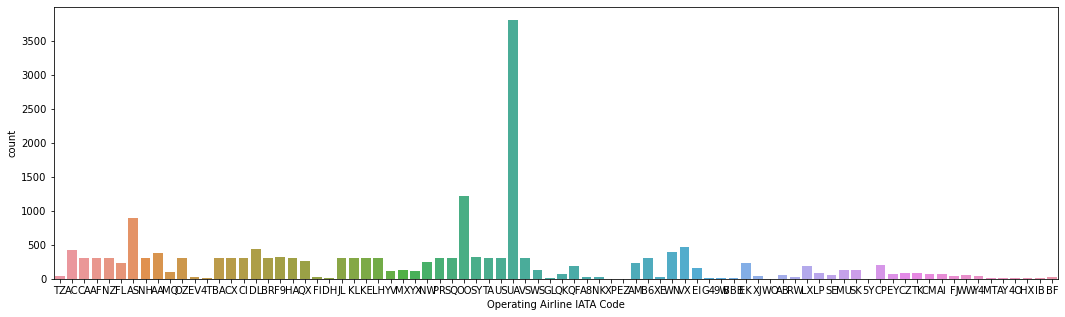

In [11]:
plt.figure(figsize=(18,5))
sns.countplot(x=df["Operating Airline IATA Code"]);

In [12]:
df["Published Airline IATA Code"].value_counts(ascending=False)

UA     4649
AS     1203
DL      975
AA      588
AC      484
       ... 
BBB       6
WO        3
EZ        2
XP        2
5Y        2
Name: Published Airline IATA Code, Length: 73, dtype: int64

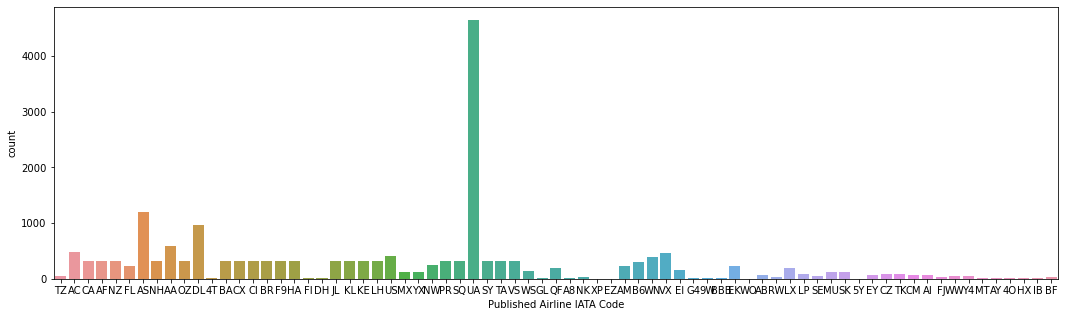

In [13]:
plt.figure(figsize=(18,5))
sns.countplot(x=df["Published Airline IATA Code"]);

In [14]:
#we can use the real names instead of IATA Codes

In [15]:
#we can see that the Activity Period values are written like yyyymm, we should seperate them first

In [16]:
df["Activity Year"] = df["Activity Period"].astype(str).str[:4]
df["Activity Month"] = df["Activity Period"].astype(str).str[4:]

In [17]:
# now convert them as integer

In [18]:
df["Activity Year"] = df["Activity Year"].astype(int)
df["Activity Month"] = df["Activity Month"].astype(int)

In [19]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Activity Year,Activity Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7


In [20]:
# now we can delete "Activity Period"
del df["Activity Period"]

In [21]:
df.head()

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Activity Year,Activity Month
0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7


In [22]:
# EDA

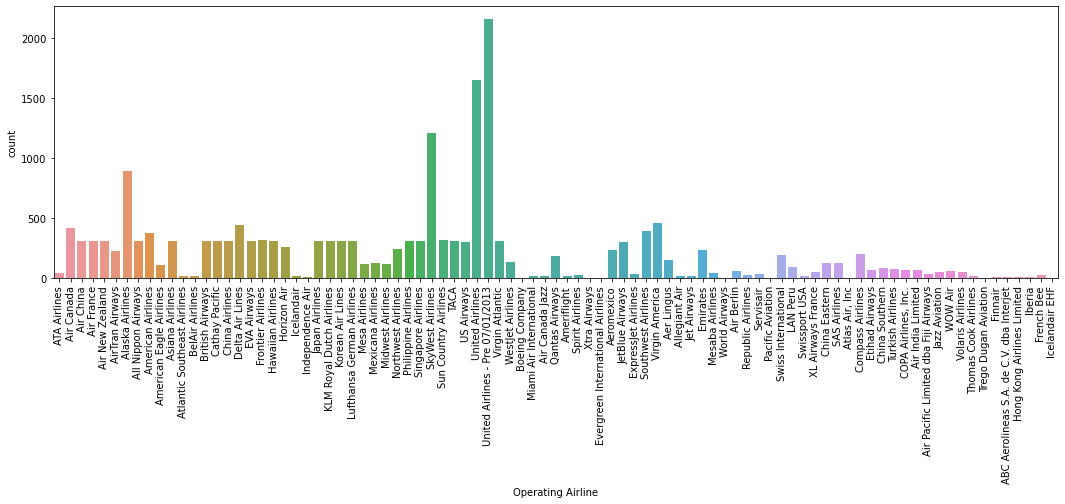

In [23]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sns.countplot(x=df["Operating Airline"]);

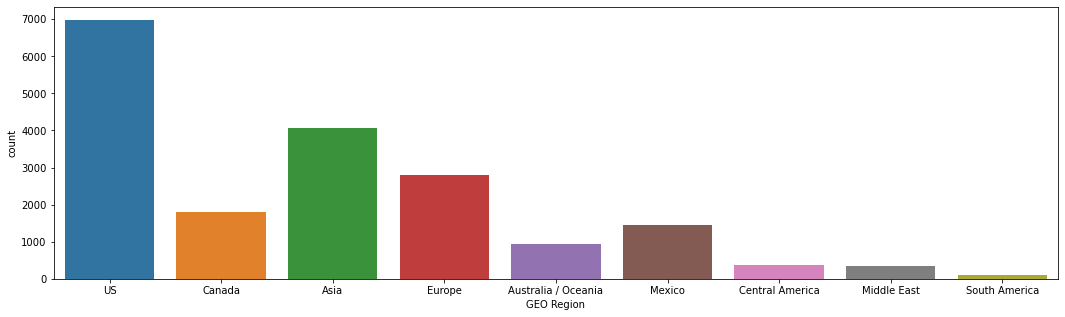

In [24]:
plt.figure(figsize=(18,5))
sns.countplot(x=df["GEO Region"]);

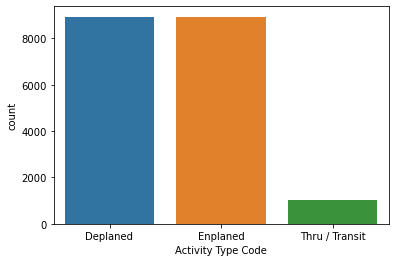

In [25]:
sns.countplot(x=df["Activity Type Code"]);

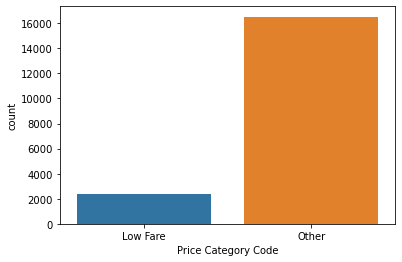

In [26]:
sns.countplot(x=df["Price Category Code"]);

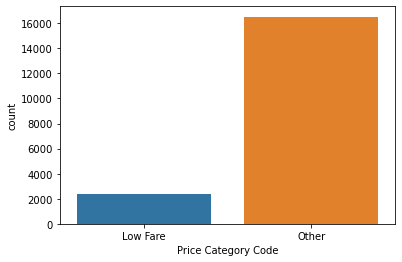

In [27]:
sns.countplot(x=df["Price Category Code"]);

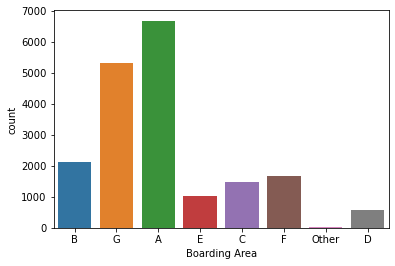

In [28]:
sns.countplot(x=df["Boarding Area"]);

In [29]:
df["Operating Airline"].value_counts()

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: Operating Airline, Length: 89, dtype: int64

In [30]:
df.groupby(df["Operating Airline"]).sum()

,Passenger Count,Activity Year,Activity Month
Operating Airline,,,
ABC Aerolineas S.A. de C.V. dba Interjet,15585,16144,36
ATA Airlines,384764,88255,300
Aer Lingus,777691,306034,986
Aeromexico,1672946,471074,1498
Air Berlin,235155,120792,450
...,...,...,...
WOW Air,295168,112956,345
WestJet Airlines,799801,271690,980
World Airways,785,6030,25


In [31]:
df.groupby(df["Operating Airline"]).sum()["Passenger Count"].sort_values(ascending=False)

Operating Airline
United Airlines                     112640408
United Airlines - Pre 07/01/2013    105363917
SkyWest Airlines                     44582356
American Airlines                    43622387
Virgin America                       37843920
                                      ...    
Xtra Airways                              146
Ameriflight                               110
Atlas Air, Inc                             68
Boeing Company                             18
Evergreen International Airlines            4
Name: Passenger Count, Length: 89, dtype: int64

In [32]:
# we want to cluster number of flights and number of passengers

In [33]:
num_of_flights = df["Operating Airline"].value_counts() # number of flights for each operating airline

In [34]:
num_of_passenger = df.groupby(df["Operating Airline"]).sum()["Passenger Count"].sort_values(ascending=False)

In [35]:
num_of_flights

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: Operating Airline, Length: 89, dtype: int64

In [36]:
num_of_passenger

Operating Airline
United Airlines                     112640408
United Airlines - Pre 07/01/2013    105363917
SkyWest Airlines                     44582356
American Airlines                    43622387
Virgin America                       37843920
                                      ...    
Xtra Airways                              146
Ameriflight                               110
Atlas Air, Inc                             68
Boeing Company                             18
Evergreen International Airlines            4
Name: Passenger Count, Length: 89, dtype: int64

In [37]:
#flights data frame
fdf=pd.DataFrame(num_of_flights)

In [38]:
fdf

,Operating Airline
United Airlines - Pre 07/01/2013,2154
United Airlines,1653
SkyWest Airlines,1212
Alaska Airlines,891
Virgin America,462
...,...
Xtra Airways,2
Evergreen International Airlines,2
Pacific Aviation,2
Icelandair EHF,2


In [39]:
#passengers data frame

In [40]:
pdf=pd.DataFrame(num_of_passenger)

In [41]:
pdf

,Passenger Count
Operating Airline,
United Airlines,112640408
United Airlines - Pre 07/01/2013,105363917
SkyWest Airlines,44582356
American Airlines,43622387
Virgin America,37843920
...,...
Xtra Airways,146
Ameriflight,110
"Atlas Air, Inc",68


In [42]:
x=df[["Passenger Count","Activity Year"]]

In [43]:
x.head()

,Passenger Count,Activity Year
0,27271,2005
1,29131,2005
2,5415,2005
3,35156,2005
4,34090,2005


In [44]:
model=KMeans(n_clusters=3)

In [45]:
model=model.fit(x)

In [46]:
tahmin=model.predict(x)

In [47]:
tahmin

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
x["clusters"]=tahmin

In [49]:
x.head()

,Passenger Count,Activity Year,clusters
0,27271,2005,0
1,29131,2005,0
2,5415,2005,0
3,35156,2005,0
4,34090,2005,0


In [50]:
silhouette_score(x,tahmin)

0.8286420911446416

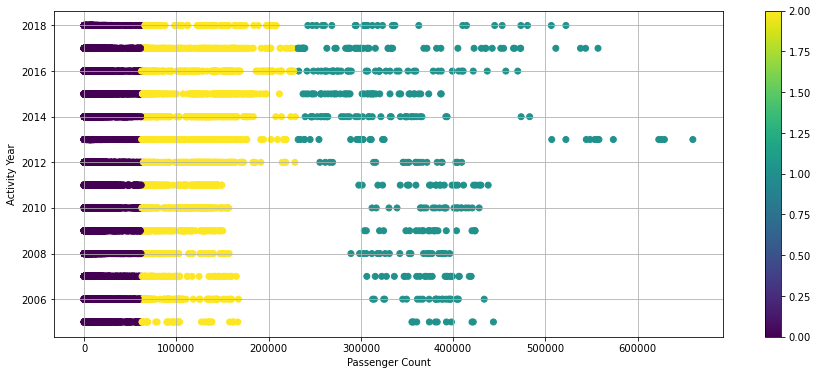

In [51]:
plt.figure(figsize=(15,6))
plt.scatter(x["Passenger Count"],x["Activity Year"],c=tahmin);
plt.xlabel("Passenger Count")
plt.ylabel("Activity Year")
plt.colorbar()
plt.grid()

In [52]:
# elbow method: grubu böle böle artik silhouette_score degismessze en uygun bölme o

In [53]:
allscore = []
allclusters = []
uzakliklar = []

# clustere göre score'in degismesi
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("Cluster ",i, " score ",score)
        #score ve uzaklik yukardaki listelere eklememiz lazim
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(10)

Cluster  2  score  0.8596461549819766
Cluster  3  score  0.8286420911446416
Cluster  4  score  0.7860899725592359
Cluster  5  score  0.7846346230991761
Cluster  6  score  0.6590483787873
Cluster  7  score  0.657979223458308
Cluster  8  score  0.6467658367109702
Cluster  9  score  0.6419060762598727
Cluster  10  score  0.6158182446824819
Cluster  11  score  0.6083911787466987


In [54]:
# bunun grafigini cizelim

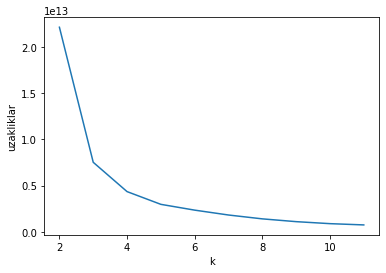

In [55]:
plt.xlabel("k")
plt.ylabel("uzakliklar")
plt.plot(allclusters,uzakliklar);
#grafik nerde kiriliyor, orda durmamiz gerekiyor

In [56]:
# model 2

In [57]:
model2=KMeans(n_clusters=5)

In [58]:
model2=model2.fit(x)

In [59]:
tahmin2=model2.predict(x)

In [60]:
tahmin2

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
x["clusters"]=tahmin2

In [62]:
x.head()

,Passenger Count,Activity Year,clusters
0,27271,2005,0
1,29131,2005,0
2,5415,2005,0
3,35156,2005,3
4,34090,2005,3


In [63]:
silhouette_score(x,tahmin2)

0.7846346238414775

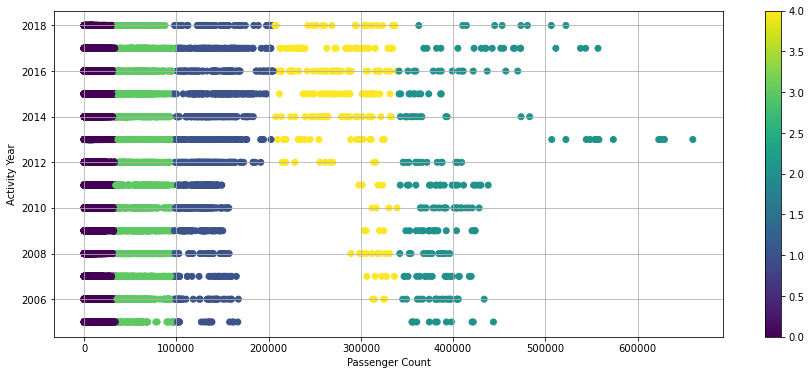

In [64]:
plt.figure(figsize=(15,6))
plt.scatter(x["Passenger Count"],x["Activity Year"],c=tahmin2);
plt.xlabel("Passenger Count")
plt.ylabel("Activity Year")
plt.colorbar()
plt.grid()

In [65]:
allscore = []
allclusters = []
uzakliklar = []

# clustere göre score'in degismesi
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("Cluster ",i, " score ",score)
        #score ve uzaklik yukardaki listelere eklememiz lazim
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(10)

Cluster  2  score  0.8596461548835543
Cluster  3  score  0.8286420909057404
Cluster  4  score  0.7860284375130714
Cluster  5  score  0.7844922842428561
Cluster  6  score  0.6613371716399493
Cluster  7  score  0.6609367992218328
Cluster  8  score  0.6470522310149482
Cluster  9  score  0.641340070334617
Cluster  10  score  0.6139959200365959
Cluster  11  score  0.6114364924323578


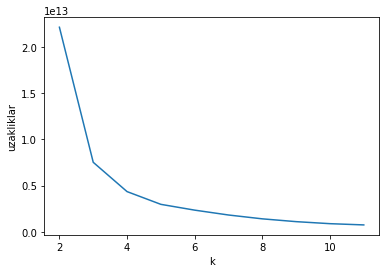

In [66]:
plt.xlabel("k")
plt.ylabel("uzakliklar")
plt.plot(allclusters,uzakliklar);

In [67]:
x=pd.get_dummies(df,drop_first=True)

In [68]:
x.head()

,Passenger Count,Activity Year,Activity Month,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,...,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other
0,27271,2005,7,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,29131,2005,7,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,5415,2005,7,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,35156,2005,7,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,34090,2005,7,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [69]:
model3=KMeans(n_clusters=3)

In [70]:
model3=model3.fit(x)

In [71]:
tahmin3=model3.predict(x)

In [72]:
tahmin3

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
x["clusters"]=tahmin3

In [74]:
x.head()

,Passenger Count,Activity Year,Activity Month,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,...,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other,clusters
0,27271,2005,7,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29131,2005,7,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5415,2005,7,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,35156,2005,7,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,34090,2005,7,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
silhouette_score(x,tahmin3)

0.8285979403860193

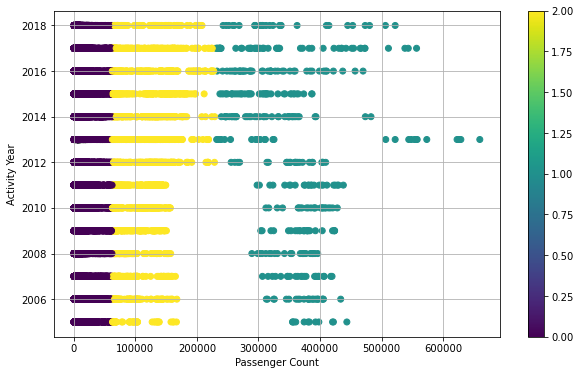

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(x["Passenger Count"],x["Activity Year"],c=tahmin3);
plt.xlabel("Passenger Count")
plt.ylabel("Activity Year")
plt.colorbar()
plt.grid()